In [2]:
import numpy as np

Xtest = np.loadtxt("Xtest.csv", delimiter=' ')
Xtrain = np.loadtxt("Xtrain.csv", delimiter=' ' )
Ytrain = np.loadtxt("Ytrain.csv", delimiter=' ')

In [3]:
print(Xtrain.shape)
print(Ytrain.shape)

(3000, 784)
(3000,)


There are 3000 rows (images) with corespoinding 3000 labels. 

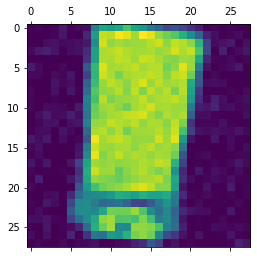

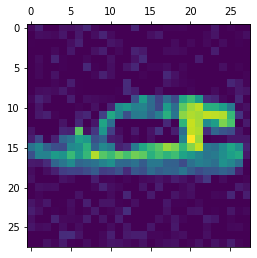

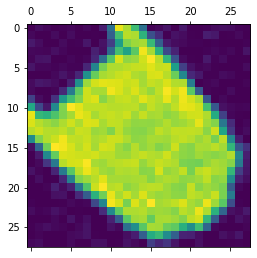

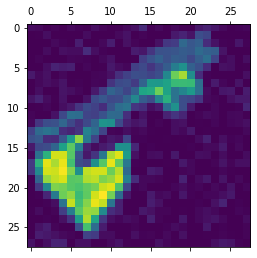

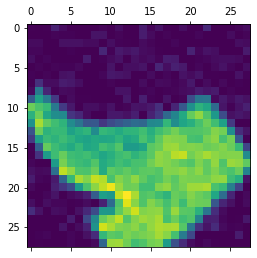

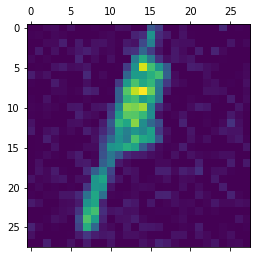

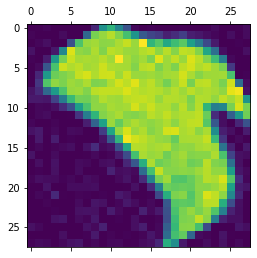

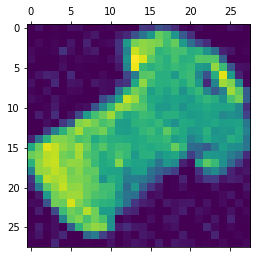

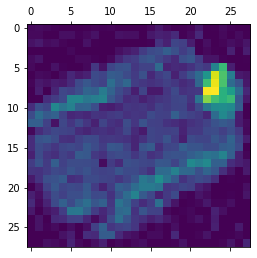

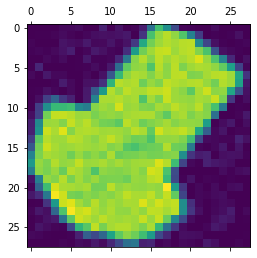

In [9]:
import matplotlib.pyplot as plt

pos = Xtrain[Ytrain == 1]
neg = Xtrain[Ytrain == -1]
for i in range(10,15): 
    image_pos = np.reshape(pos[i], (28,28))
    image_neg = np.reshape(neg[i], (28,28))
    plt.matshow(image_pos)
    plt.matshow(image_neg)

In [104]:
np.unique(Ytrain, return_counts=True)

(array([-1.,  1.]), array([1821, 1179]))


1821 negatives and 1179 positive labels

1 iv) If the random classifier could at mo

In [107]:
1821/3000 * 1821/3000  + 1179/3000 * 1179/3000

0.522898

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

sknn = KNeighborsClassifier(n_neighbors=1)

skf = StratifiedKFold(n_splits=5)

scores = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)

Accuracy: 0.75 (+/- 0.03)


In [36]:
print(scores)
# Accuracy basic summary
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores.mean(), scores.std())

[0.77833333 0.75333333 0.74       0.75833333 0.74      ]
Accuracy: 0.75 (+/- 0.03)
0.7539999999999999 0.01416568624058385


In [27]:
# Scaling
from sklearn import preprocessing
scaling = preprocessing.StandardScaler().fit(Xtrain)
Xscale = scaling.transform(Xtrain)

scaled_scores = cross_val_score(sknn, Xscale, Ytrain, cv=skf)

In [33]:
print(scaled_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scaled_scores.mean(), scaled_scores.std() * 2))
print(scaled_scores.mean(), scaled_scores.std())
# Accuracy is mildly better - higer accuracy with slightly lower standard deviation.

[0.74333333 0.75333333 0.77       0.77833333 0.75666667]
Accuracy: 0.76 (+/- 0.02)
0.7603333333333333 0.012400716825158862


In [34]:
# MinMax Scaler
min_max_scaler = preprocessing.MinMaxScaler()
Xtrain_minmax = min_max_scaler.fit_transform(Xtrain)

minmax_scores = cross_val_score(sknn, Xtrain_minmax, Ytrain, cv=skf)

In [35]:
print(minmax_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (minmax_scores.mean(), minmax_scores.std() * 2))
print(minmax_scores.mean(), minmax_scores.std())
# Accuracy is no better than with the unproccessde data, yet slightly lower standard deviation. 
# Still inferior to scaling.

[0.77166667 0.75166667 0.74       0.76       0.74      ]
Accuracy: 0.75 (+/- 0.02)
0.7526666666666667 0.01213809430402207


In [38]:
# MaxAbs Scaler - must be centered at zero a priori

demeaning = preprocessing.StandardScaler(with_std=False).fit(Xtrain)
Xdemeaned = scaling.transform(Xtrain)
max_abs_scaler = preprocessing.MaxAbsScaler()
Xtrain_maxabs = max_abs_scaler.fit_transform(Xdemeaned)

maxabs_scores = cross_val_score(sknn, Xtrain_maxabs, Ytrain, cv=skf)

In [40]:
print(maxabs_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (maxabs_scores.mean(), maxabs_scores.std() * 2))
print(maxabs_scores.mean(), maxabs_scores.std())
# Due to lowest mean - worse predictor, yet the smallers s.d by construction. 
# Still no real imporovement over the simple scaling. 

[0.755      0.75166667 0.74333333 0.76       0.73333333]
Accuracy: 0.75 (+/- 0.02)
0.7486666666666666 0.009392668535736943


Data is not sparse, hence sparsity transformation will not be applied.

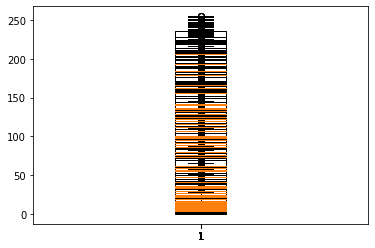

In [59]:
# Checking for outliers

from scipy import stats
for i in range(784):
    print(stats.mstats.mquantiles(Xtrain[:][i])
          
for i in range(5):
    plt.boxplot(Xtrain[:][i])

In [60]:
# Robust Scaling
robust_scaling = preprocessing.RobustScaler().fit(Xtrain)
Xrobust = robust_scaling.transform(Xtrain)

robust_scores = cross_val_score(sknn, Xrobust, Ytrain, cv=skf)

In [61]:
print(robust_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (robust_scores.mean(), robust_scores.std() * 2))
print(robust_scores.mean(), robust_scores.std())
# Outliers are unlikelly given the nature of the data (pixels).
# Returns a worse accuracy - extreme values helps to classify

[0.72333333 0.76666667 0.74166667 0.735      0.75166667]
Accuracy: 0.74 (+/- 0.03)
0.7436666666666667 0.014734690736866903


In [62]:
# Uniform distribution transformation

quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
Xuniform = quantile_transformer.fit_transform(Xtrain)

uniform_scores = cross_val_score(sknn, Xuniform, Ytrain, cv=skf)

In [63]:
print(uniform_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (uniform_scores.mean(), uniform_scores.std() * 2))
print(uniform_scores.mean(), uniform_scores.std())
# Mildly better than scaling

[0.78666667 0.75666667 0.75166667 0.755      0.75833333]
Accuracy: 0.76 (+/- 0.03)
0.7616666666666666 0.012692955176439823


In [69]:
normal_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
Xnormal = normal_transformer.fit_transform(Xtrain)

normal_scores = cross_val_score(sknn, Xnormal, Ytrain, cv=skf)

In [70]:
print(normal_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (normal_scores.mean(), normal_scores.std() * 2))
print(normal_scores.mean(), normal_scores.std())
# terrible

[0.64333333 0.66833333 0.65666667 0.67166667 0.665     ]
Accuracy: 0.66 (+/- 0.02)
0.6609999999999999 0.010143416036468634


In [75]:
BoxCox = preprocessing.PowerTransformer(method='box-cox', standardize=False)

# due to the zero values in the data
Xboxcox = BoxCox.fit_transform(Xtrain+1)

boxcox_scores = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)

In [76]:
print(boxcox_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (boxcox_scores.mean(), boxcox_scores.std() * 2))
print(boxcox_scores.mean(), boxcox_scores.std())
# not too bad, but not better than simple scaling or uniform disribution

[0.77833333 0.75333333 0.74       0.75833333 0.74      ]
Accuracy: 0.75 (+/- 0.03)
0.7539999999999999 0.01416568624058385


Stick with the scaling due to the simplicity

In [95]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []
cv_std = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xscale, Ytrain, cv=skf, scoring='accuracy')
    cv_scores.append((k,scores.mean()))
    cv_std.append((k,scores.std()))

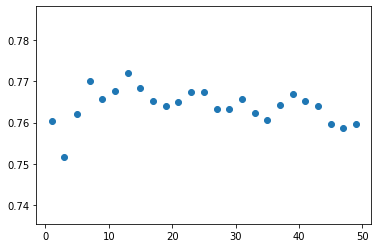

In [96]:
zip(*cv_scores)
plt.scatter(*zip(*cv_scores))
plt.show()

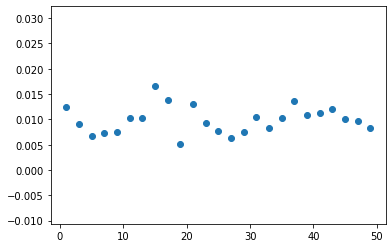

In [97]:
zip(*cv_std)
plt.scatter(*zip(*cv_std))
plt.show()

In [98]:
# creating odd list of K for KNN
neighbors = list(range(50, 100, 2))

# empty list that will hold cv scores
cv_scores_next = []
cv_std_next = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xscale, Ytrain, cv=skf, scoring='accuracy')
    cv_scores_next.append((k,scores.mean()))
    cv_std_next.append((k,scores.std()))

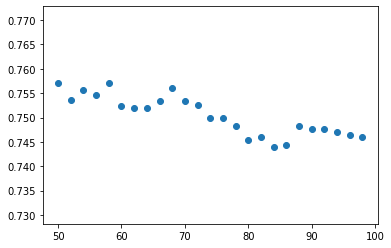

In [99]:
zip(*cv_scores_next)
plt.scatter(*zip(*cv_scores_next))
plt.show()

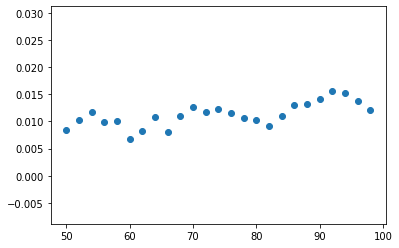

In [100]:
zip(*cv_std_next)
plt.scatter(*zip(*cv_std_next))
plt.show()

In [106]:
print(cv_scores)

[(1, 0.7603333333333333), (3, 0.7516666666666667), (5, 0.7619999999999999), (7, 0.7699999999999999), (9, 0.7656666666666666), (11, 0.7676666666666667), (13, 0.772), (15, 0.7683333333333333), (17, 0.7653333333333332), (19, 0.764), (21, 0.765), (23, 0.7673333333333334), (25, 0.7673333333333334), (27, 0.7633333333333334), (29, 0.7633333333333333), (31, 0.7656666666666666), (33, 0.7623333333333333), (35, 0.7606666666666666), (37, 0.7643333333333333), (39, 0.767), (41, 0.7653333333333333), (43, 0.764), (45, 0.7596666666666666), (47, 0.7586666666666666), (49, 0.7596666666666667)]


Test 12 and 14 now. k=3 seems to be the best

In [107]:
# creating odd list of K for KNN
neighbors = list(range(12, 15, 1))

# empty list that will hold cv scores
cv_scores_mid = []
cv_std_mid = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xscale, Ytrain, cv=skf, scoring='accuracy')
    cv_scores_mid.append((k,scores.mean()))
    cv_std_mid.append((k,scores.std()))

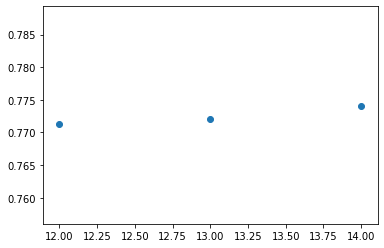

[(12, 0.7713333333333333), (13, 0.772), (14, 0.774)]


In [109]:
zip(*cv_scores_mid)
plt.scatter(*zip(*cv_scores_mid))
plt.show()
print(cv_scores_mid)

In [ ]:
so choose k=14